# Proyek Analisis Data: Bike Sharing
- **Nama:** Camelia Regista
- **Email:** cameliaregista05@gmail.com
- **ID Dicoding:** cameliaregista

## Menentukan Pertanyaan Bisnis

## **Membuat Pertanyaan ⚛**

**Goals : Menemukan Pola Kebiasaan dari Pelanggan Arumaniaga**

1. Di musim mana kah, pengguna rental banyak melakukan transaksi rental sepeda ?
2. Apakah, di waktu liburan banyak yang melakukan rental sepeda ?
3. Apakah di hari kerja banyak yang melakukan transaksi rental sepeda ?
4. Bagaimana Trend transaksi rental sepeda di Arumaniaga setiap bulan ?



# **<font color='navy'>Selamat Berpetualang di tahap EDA ✈</font>**

## Import Semua Packages/Library yang Digunakan

In [5]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
'''
Pada tahap ini, kita memiliki data dua sumber data yang terbagi menjadi dua CSV.
Tentu saja, di tahap selanjutnya adalah kita akan membuat sebuah dataframe yang
baru, yang berisi gabungan informasi yang di dapat dari dua file tersebut.
Penggabungan data ini tentu saja, sangat memeperhatikan prinsip quality of data.
'''

'\nPada tahap ini, kita memiliki data dua sumber data yang terbagi menjadi dua CSV.\nTentu saja, di tahap selanjutnya adalah kita akan membuat sebuah dataframe yang\nbaru, yang berisi gabungan informasi yang di dapat dari dua file tersebut.\nPenggabungan data ini tentu saja, sangat memeperhatikan prinsip quality of data.\n'

## Data Wrangling

### Gathering Data

In [6]:
# Import data from local disk
day_df = pd.read_csv("day.csv")
day_df.head()

# Import data from local disk
hour_df = pd.read_csv("hour.csv")
hour_df.head()

# Merging data
df_merge = pd.merge(
    left = day_df,
    right = hour_df,
    how = "inner",
    left_on = "instant",
    right_on = "instant"
)

# df_merge result
pd.set_option('display.max_columns', 40) # to set display columns
df_merge.head()


,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,hum_x,windspeed_x,casual_x,registered_x,cnt_x,dteday_y,season_y,yr_y,mnth_y,hr,holiday_y,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [7]:
df_merge = df_merge.rename(columns=lambda x: x.replace('_x', '_day').replace('_y', '_hour')) # mengganti suffiks _x & _y dengan _day & _hour
df_merge.head()

,instant,dteday_day,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,dteday_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
# info data
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          731 non-null    int64  
 1   dteday_day       731 non-null    object 
 2   season_day       731 non-null    int64  
 3   yr_day           731 non-null    int64  
 4   mnth_day         731 non-null    int64  
 5   holiday_day      731 non-null    int64  
 6   weekday_day      731 non-null    int64  
 7   workingday_day   731 non-null    int64  
 8   weathersit_day   731 non-null    int64  
 9   temp_day         731 non-null    float64
 10  atemp_day        731 non-null    float64
 11  hum_day          731 non-null    float64
 12  windspeed_day    731 non-null    float64
 13  casual_day       731 non-null    int64  
 14  registered_day   731 non-null    int64  
 15  cnt_day          731 non-null    int64  
 16  dteday_hour      731 non-null    object 
 17  season_hour     

In [9]:
# Cek data duplikat
df_merge.duplicated().sum()

0

In [10]:
# Cek missing value
df_merge.isnull().sum()

instant            0
dteday_day         0
season_day         0
yr_day             0
mnth_day           0
holiday_day        0
weekday_day        0
workingday_day     0
weathersit_day     0
temp_day           0
atemp_day          0
hum_day            0
windspeed_day      0
casual_day         0
registered_day     0
cnt_day            0
dteday_hour        0
season_hour        0
yr_hour            0
mnth_hour          0
hr                 0
holiday_hour       0
weekday_hour       0
workingday_hour    0
weathersit_hour    0
temp_hour          0
atemp_hour         0
hum_hour           0
windspeed_hour     0
casual_hour        0
registered_hour    0
cnt_hour           0
dtype: int64

### Cleaning Data

In [11]:
# Mengganti value coloum season
tupple_map = [(1, 'springer'), (2, 'summer'), (3, 'fall'), (4, 'winter')]
for condition, value in tupple_map:
    df_merge.loc[df_merge['season_day'] == condition, 'season_day'] = value

# Mengganti value column yr_day
yr_map =[(0, '2011'), (1, '2012')]
for condition, value in yr_map:
  df_merge.loc[df_merge['yr_day'] == condition, 'yr_day'] = value

# Mengganti value column month_day
month_map =[(1, 'January'), (2, 'February'), (3, 'March'), (4, 'April'), (5, 'May'),
            (6, 'June'),(7, 'July'), (8, 'August'), (9, 'September'), (10, 'October'),
            (11, 'November'), (12, 'December')]
for condition, value in month_map:
  df_merge.loc[df_merge['mnth_day'] == condition, 'mnth_day'] = value

# Mengganti value column weekday_day
weekday_map =[(0, 'Sunday'), (1, 'Monday'), (2, 'Tuesday'), (3, 'Wednesday'),
            (4, 'Thursday'),(5, 'Friday'), (6, 'Saturday')]
for condition, value in weekday_map:
  df_merge.loc[df_merge['weekday_day'] == condition, 'weekday_day'] = value

# Mengganti value column holiday_day
holiday_map =[(0, 'No'), (1, 'Yes')]
for condition, value in holiday_map:
  df_merge.loc[df_merge['holiday_day'] == condition, 'holiday_day'] = value

# Mengganti value column working_day
workingday_map =[(0, 'No'), (1, 'Yes')]
for condition, value in workingday_map:
  df_merge.loc[df_merge['workingday_day'] == condition, 'workingday_day'] = value

# Mengganti value column weathersit_day
weathersit_day_map =[(1, 'Clear'), (2, 'Few Clouds'), (3, 'Party Cloudy')]
for condition, value in weathersit_day_map:
  df_merge.loc[df_merge['weathersit_day'] == condition, 'weathersit_day'] = value

df_merge.head()

,instant,dteday_day,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,dteday_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,springer,2011,January,No,Saturday,No,Few Clouds,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,springer,2011,January,No,Sunday,No,Few Clouds,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,springer,2011,January,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,springer,2011,January,No,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,springer,2011,January,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
# Mengganti value coloumn season
yr_map = [(1, 'springer'), (2, 'summer'), (3, 'fall'), (4, 'winter')]
for condition, value in yr_map:
    df_merge.loc[df_merge['season_hour'] == condition, 'season_hour'] = value

# Mengganti value column yr_day
yr_map =[(0, '2011'), (1, '2012')]
for condition, value in yr_map:
  df_merge.loc[df_merge['yr_hour'] == condition, 'yr_hour'] = value

# Mengganti value column month_day
month_map =[(1, 'January'), (2, 'February'), (3, 'March'), (4, 'April'), (5, 'May'),
            (6, 'June'),(7, 'July'), (8, 'August'), (9, 'September'), (10, 'October'),
            (11, 'November'), (12, 'December')]
for condition, value in month_map:
  df_merge.loc[df_merge['mnth_hour'] == condition, 'mnth_hour'] = value

# Mengganti value column weekday_day
weekday_map =[(0, 'Sunday'), (1, 'Monday'), (2, 'Tuesday'), (3, 'Wednesday'),
            (4, 'Thursday'),(5, 'Friday'), (6, 'Saturday')]
for condition, value in weekday_map:
  df_merge.loc[df_merge['weekday_hour'] == condition, 'weekday_hour'] = value

# Mengganti value column holiday_day
holiday_map =[(0, 'No'), (1, 'Yes')]
for condition, value in holiday_map:
  df_merge.loc[df_merge['holiday_hour'] == condition, 'holiday_hour'] = value

# Mengganti value column working_day
workingday_map =[(0, 'No'), (1, 'Yes')]
for condition, value in workingday_map:
  df_merge.loc[df_merge['workingday_hour'] == condition, 'workingday_hour'] = value

# Mengganti value column weathersit_day
weathersit_day_map =[(1, 'Clear'), (2, 'Few Clouds'), (3, 'Party Cloudy')]
for condition, value in weathersit_day_map:
  df_merge.loc[df_merge['weathersit_hour'] == condition, 'weathersit_hour'] = value


df_merge.head() # Tampilkan 5 baris pertama

,instant,dteday_day,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,dteday_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,springer,2011,January,No,Saturday,No,Few Clouds,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01,springer,2011,January,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,springer,2011,January,No,Sunday,No,Few Clouds,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-01,springer,2011,January,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,springer,2011,January,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-01,springer,2011,January,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,springer,2011,January,No,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-01,springer,2011,January,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,springer,2011,January,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-01,springer,2011,January,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
# mengubah nama kolom
df_merge.rename(columns={'dteday_day': 'date_day'}, inplace=True)
df_merge.rename(columns={'yr_day': 'year_day'}, inplace=True)
df_merge.rename(columns={'mnth_day': 'month_day'}, inplace=True)
df_merge.rename(columns={'temp_day': 'temperature_day'}, inplace=True)
df_merge.rename(columns={'hum_day': 'humadity_day'}, inplace=True)
df_merge.rename(columns={'casual_day': 'user_non-regist_day'}, inplace=True)
df_merge.rename(columns={'registered_day':'User_Regist_day'}, inplace=True)
df_merge.rename(columns={'cnt_daay':'count_user_day'}, inplace=True)

# mengubah tipe data
df_merge['date_day'] = pd.to_datetime(df_merge['date_day'])
df_merge['dteday_hour'] = pd.to_datetime(df_merge['dteday_hour'])


# mengubah tipe data
df_merge.head()

,instant,date_day,season_day,year_day,month_day,holiday_day,weekday_day,workingday_day,weathersit_day,temperature_day,atemp_day,humadity_day,windspeed_day,user_non-regist_day,User_Regist_day,cnt_day,dteday_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,springer,2011,January,No,Saturday,No,Few Clouds,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01,springer,2011,January,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,springer,2011,January,No,Sunday,No,Few Clouds,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-01,springer,2011,January,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,springer,2011,January,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-01,springer,2011,January,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,springer,2011,January,No,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-01,springer,2011,January,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,springer,2011,January,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-01,springer,2011,January,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

In [14]:
#Melakukan copy pada dataframe asli
df_copy = df_merge.copy()
df_copy.head()

#Melakukan slicing pada dataset copy dan disimpan di dataframe baru
df_slice = df_copy.iloc[:, 1:16]
df_slice.head()

,date_day,season_day,year_day,month_day,holiday_day,weekday_day,workingday_day,weathersit_day,temperature_day,atemp_day,humadity_day,windspeed_day,user_non-regist_day,User_Regist_day,cnt_day
0,2011-01-01,springer,2011,January,No,Saturday,No,Few Clouds,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,springer,2011,January,No,Sunday,No,Few Clouds,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,springer,2011,January,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,springer,2011,January,No,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,springer,2011,January,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
# Statistik
df_slice.describe(include='number')

,temperature_day,atemp_day,humadity_day,windspeed_day,user_non-regist_day,User_Regist_day,cnt_day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Explore

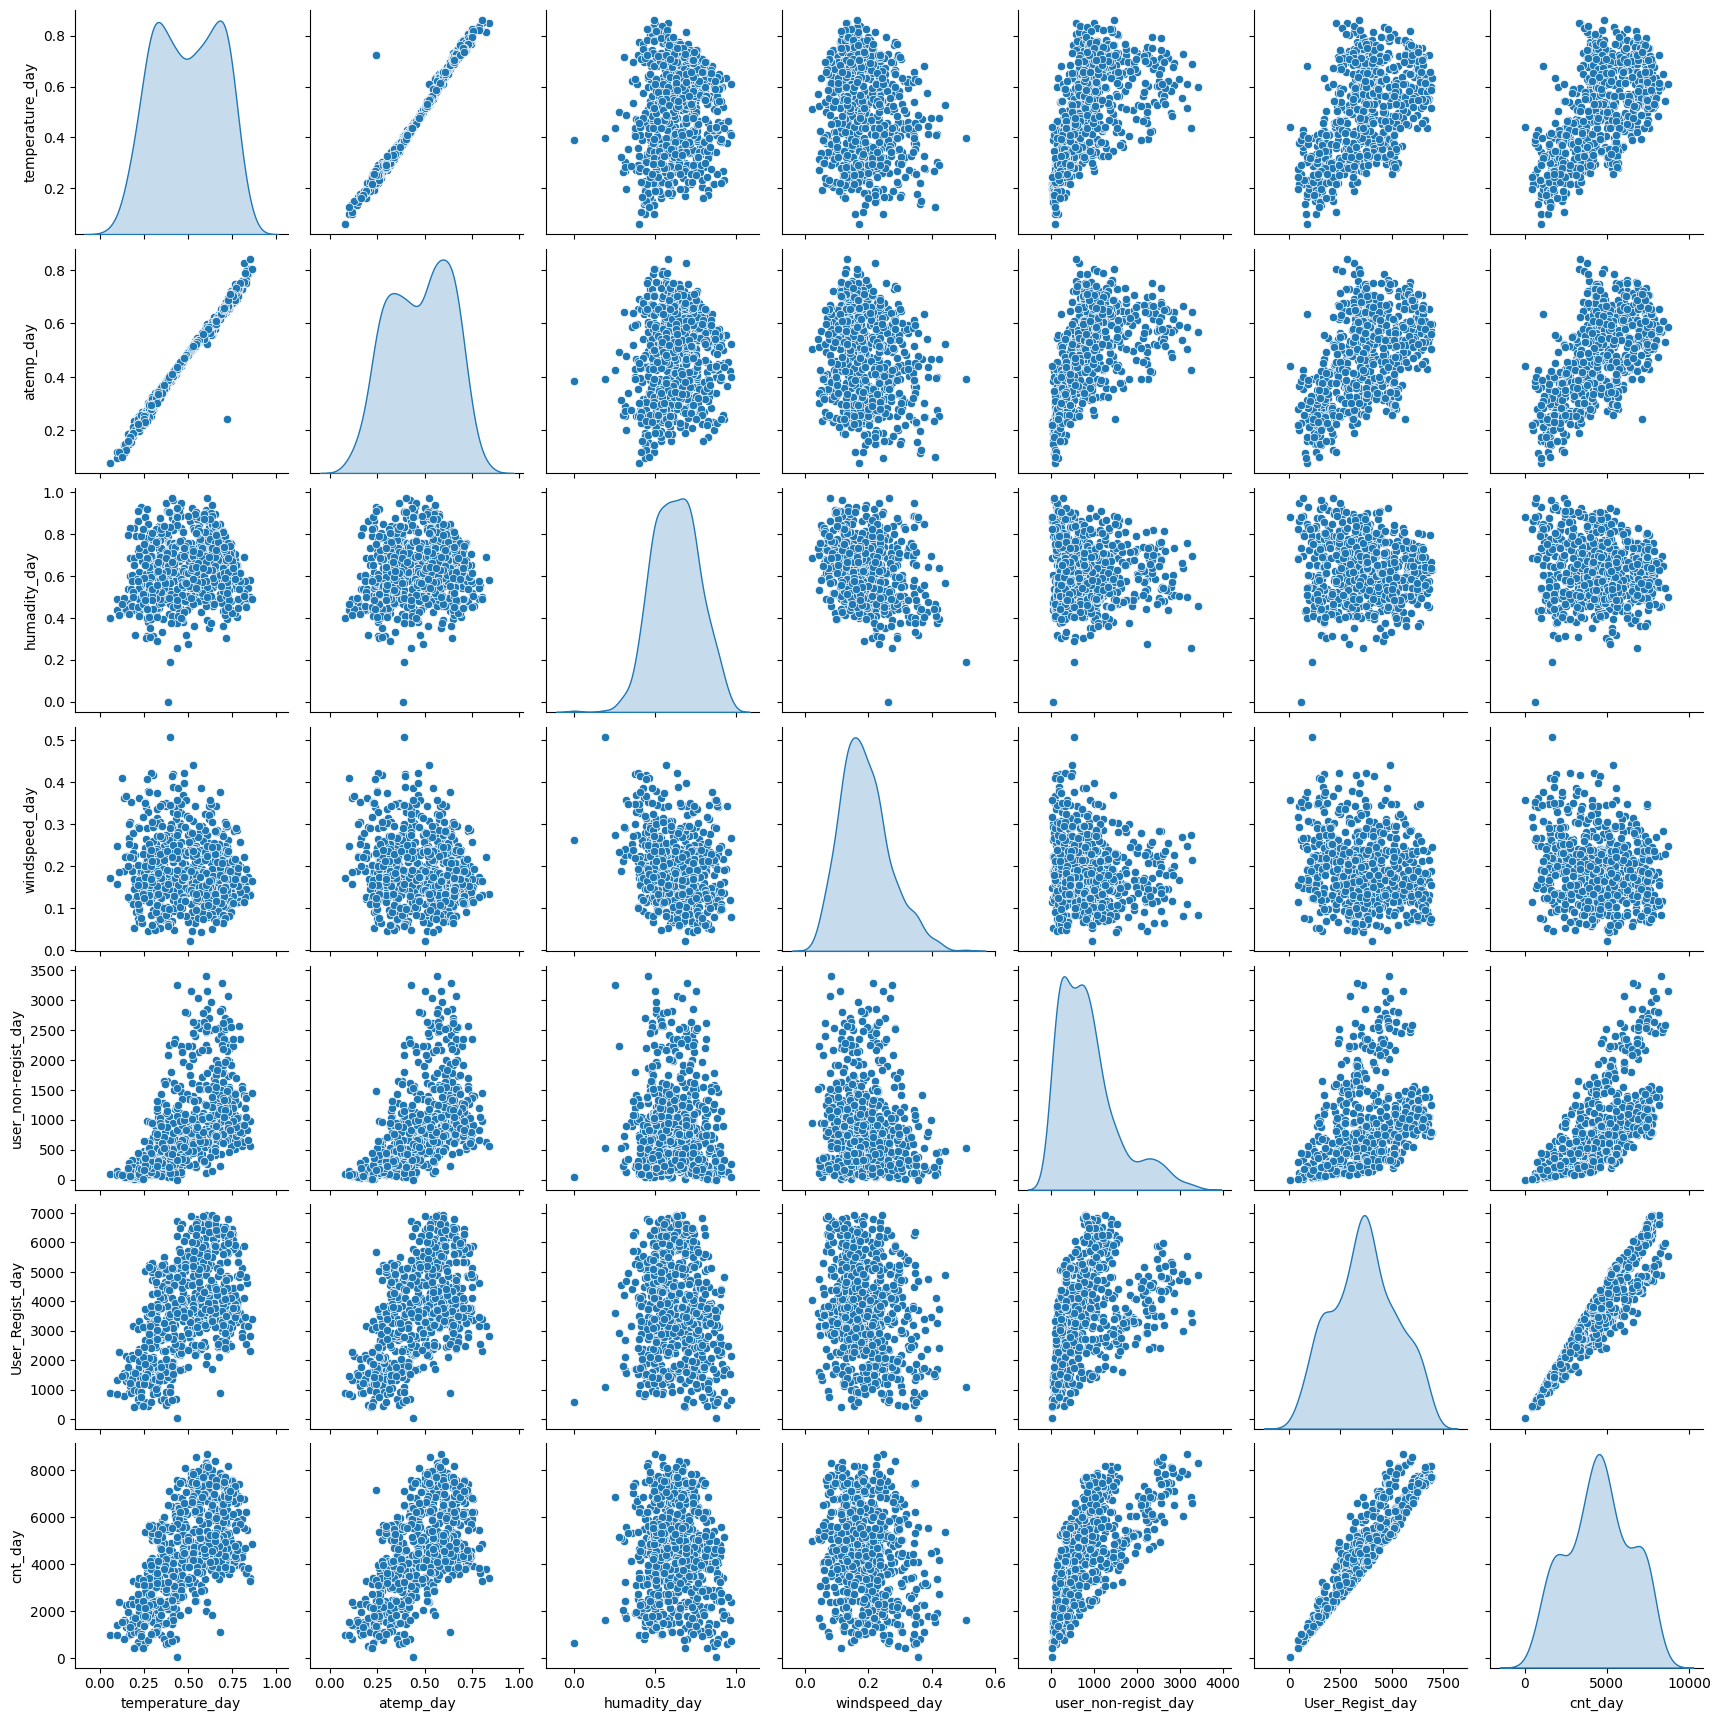

In [16]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_slice, diag_kind = 'kde');

<ipython-input-17-d85ddbc30ca9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_slice.corr().round(2)


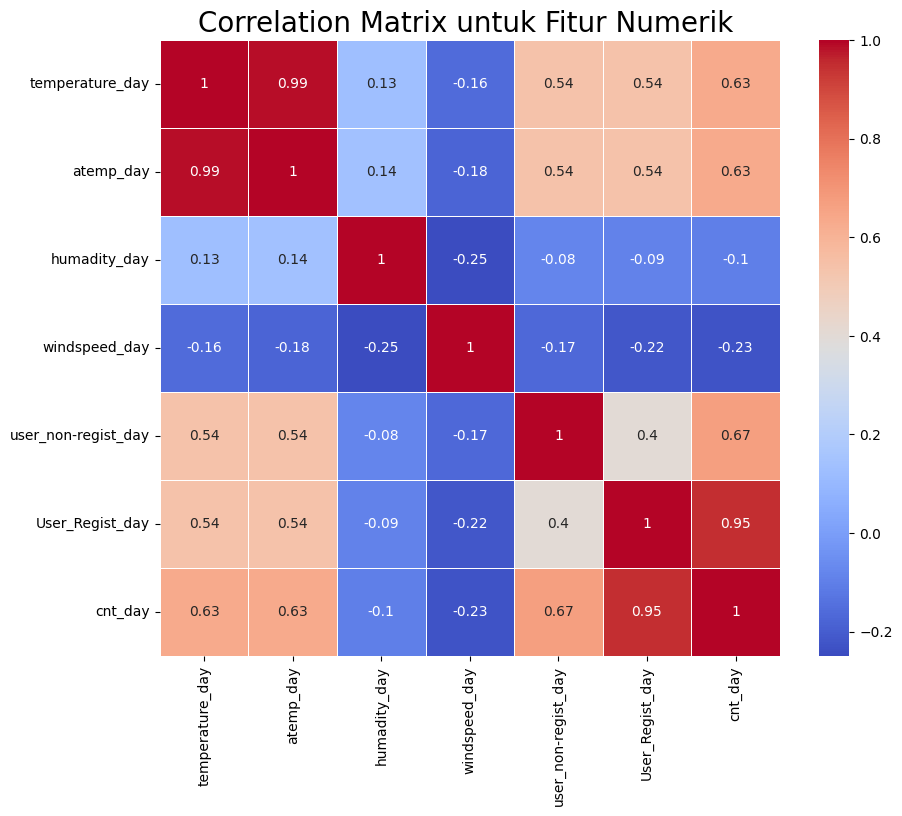

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_slice.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20);

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di musim mana kah, pengguna rental banyak melakukan transaksi rental sepeda ?

          jumlah sampel  persentase
fall                188        25.7
summer              184        25.2
springer            181        24.8
winter              178        24.4


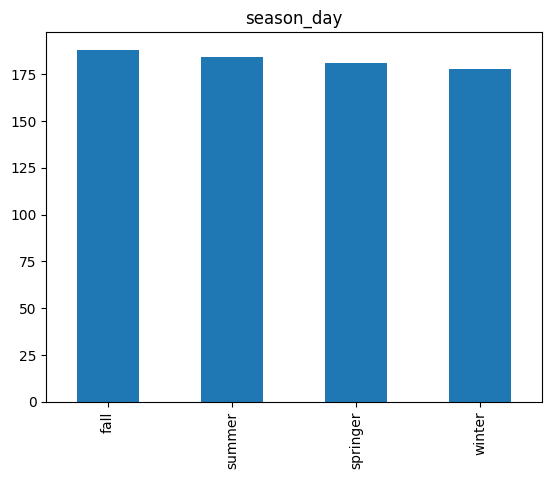

In [18]:
#Memasukan data yang bersifat kategorik
categorical_features = ['season_day','holiday_day', 'workingday_day', 'monthday']
feature = categorical_features[0]
count = df_slice[feature].value_counts()
percent = 100*df_slice[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Pertanyaan 2: Apakah, di waktu liburan banyak yang melakukan rental sepeda ?

     jumlah sampel  persentase
No             710        97.1
Yes             21         2.9


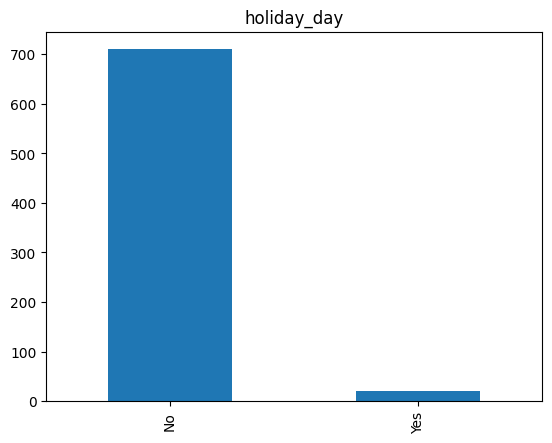

In [19]:
#Memasukan data yang bersifat kategorik
categorical_features = ['season_day','holiday_day','workingday_day', 'monthday']
feature = categorical_features[1]
count = df_slice[feature].value_counts()
percent = 100*df_slice[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

## Pertanyaan 3  : Apakah di hari kerja banyak yang melakukan transaksi rental sepeda ?

In [ ]:
#Memasukan data yang bersifat kategorik
categorical_features = ['season_day','holiday_day', 'workingday_day', 'monthday']
feature = categorical_features[2]
count = df_slice[feature].value_counts()
percent = 100*df_slice[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

## Pertanyaan 4 : Bagaimana Trend transaksi rental sepeda di Arumaniaga setiap bulan ?

Text(0, 0.5, 'Percentage')

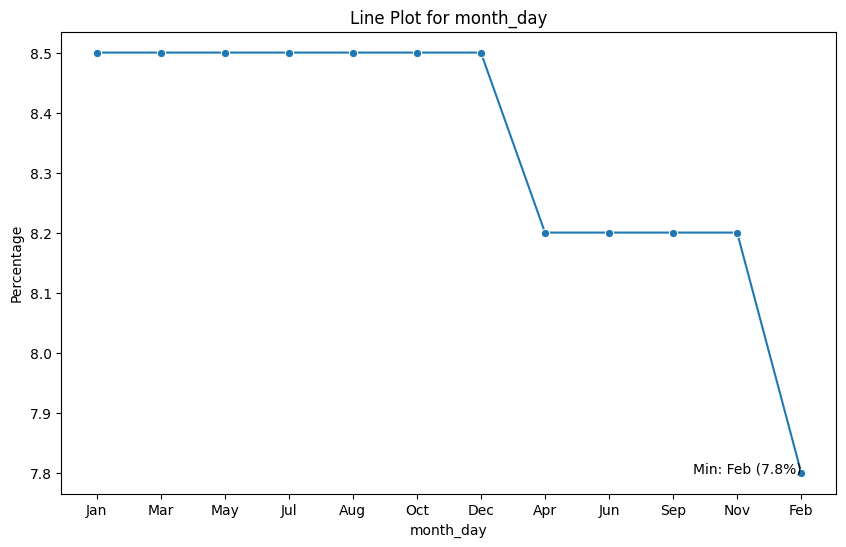

In [21]:
# Pilih fitur kategoris
categorical_features = ['season_day', 'holiday_day','workingday_day', 'month_day']
feature = categorical_features[3]

# Mengambil tiga huruf pertama dari setiap nilai di kolom 'month_day'
df_slice[feature] = df_slice[feature].str[:3]

# Hitung persentase
percent = 100 * df_slice[feature].value_counts(normalize=True)

# Buat DataFrame untuk hasil
df = pd.DataFrame({'persentase': percent.round(1)})

# Menambahkan label pada data yang memiliki persentase paling rendah
min_label = df.idxmin()['persentase']
min_value = df['persentase'].min()
label_text = f'Min: {min_label} ({min_value}%)'

# Plot line plot dengan Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y='persentase', data=df, marker='o')  # Gunakan marker='o' untuk menandai setiap titik pada garis

# Menambahkan label pada data yang memiliki persentase paling rendah
plt.text(df.idxmin()['persentase'], min_value, label_text, ha='right')

# Menyortir DataFrame berdasarkan persentase
df_sorted = df.sort_values(by='persentase', ascending=False)

plt.title(f'Line Plot for {feature}')
plt.xlabel(feature)
plt.ylabel('Percentage')

## Conclusion

# **<font color='navy'> Wawasan ☀</font>**

* Terdapat 4 kategori pada fitur season_day, secara berurutan dari jumlahnya yang paling banyak yaitu: fall, summer, springer, dan winter. Dari data persentase dapat kita simpulkan sebanyak **25.7%** sampel merupakan user lebih banyak melakukan rental sepeda pada **musim fail**.

* Terdapat 2 kategori pada fitur holiday_day, secara berurutan dari jumlahnya yang paling banyak yaitu: no & yes. Dari data persentase dapat kita simpulkan sebanyak **97.1%** sampel merupakan user lebih banyak melakukan rental sepeda di **bukan hari libur**.

* Sebaliknya 2 kategori pada fitur working_day, secara berurutan dari jumlahnya yang paling banyak yaitu: yes & no. Dari data persentase dapat kita simpulkan sebanyak **68.4%** sampel merupakan user lebih banyak melakukan rental sepeda pada **hari kerja**.

* Pola penurunan transaksi perentalan sepeda selalu di bulan dengan urutan ganjil


# **<font color='maroon'> Business Contect ☀</font>**

* Dari total 12 bulan yang direpresentasikan menggunakan line plot, terdapat pola dimana pengguna menurun di setiap urutan bulan genap dan naik di urutan bulan ganjil. Tentu ini menantang untuk dicari tahu lebih lanjut!


* Dari wawasan yang pertama, sebenarnya ini bisa menjadi pengantar kita untuk bisa meneliti dan membuat rencana strategis dengan menanyakan secara mendalam melalui wawancara terhadap pelanggan kita. Apakah karena memang sejuk atau ada faktor lainnya yang mempengaruhi. Selaras dengan hal ini, berdasarkan hasil analisis memang bahwasannya cuaca sendiri memiliki korelasi positif terhadap peningkatan pengguna. Hal ini bisa menjadi, fokus utama tim marketing dalam mempertimbangkan faktor cuaca untuk membuat rencana strategis dalam mengakuisisi user.

* Membuat rencana preverentif untuk menjaga jumlah  user di setiap bulan. Karena berdasarkan data, diketahui bahwa terdapat pola di urutan bulan ganjil pengguna selalu tinggi dan di urutan bulan genap selalu mengalami penurunan. Butuh strategi khusus untuk membuat kestabilan di setiap bulannya dan butuh pendalaman wawasan dari sisi user untuk bisa mengetahui alasannya.

* Berdasarkan data, diketahui pengguna rental sepeda ini juga lebih sering melakukan perentalan sepeda di working day ketimbang holiday. Ini wawasan menarik juga, untuk menjadi pertimbangan dalam perancangan rencana strategis marketing dan juga product. Bagaimana caranya kita bisa merancang strategi product untuk bisa menarik user untuk melakukan perentalan di hari libur


